In [1]:
# Loading Libraries
if (! require("tidyverse")) {install.packages("tidyverse") & library("tidyverse")}
if (! require("dplyr")) {install.packages("dplyr") & library("dplyr")}
if (! require("patchwork")) {install.packages("patchwork") & library("patchwork")}
if (! require("ggplot2")) {install.packages("ggplot2") & library("ggplot2")}
messages = FALSE

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: patchwork



In [2]:
# Load data protein fluorescence
pf <- read_csv("Alive_fixed_sfpH_pHluorin.csv",show_col_types = FALSE)

In [3]:
# Anonimizing columns
colnames(pf) = c("alive_pA","fix0h_pA","fix24_pA","alive_pB","fix0h_pB","fix24_pB")


In [4]:
#Exploring the first 10 rows and last 10 rows
head(pf,10)
tail(pf,10)

alive_pA,fix0h_pA,fix24_pA,alive_pB,fix0h_pB,fix24_pB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.828854,0.227805,0.147922,6.366554,3.112105,2.911222
1.833154,0.424305,0.138222,8.910854,3.508205,2.869222
1.380254,0.174105,0.146122,4.524554,2.046505,3.200122
2.172754,0.285505,0.107222,5.222654,2.116405,2.080422
1.636254,0.158905,0.065622,5.566754,3.367805,2.894522
1.561254,0.169205,0.383622,6.442254,2.390605,2.078322
1.427154,0.240105,0.023822,5.827754,3.421405,2.322522
1.407554,0.256005,0.124722,7.639954,1.966605,4.169122
1.398954,0.112905,0.082922,3.701754,3.345605,3.524922


alive_pA,fix0h_pA,fix24_pA,alive_pB,fix0h_pB,fix24_pB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,4.990454,NA,NA
NA,NA,NA,5.222054,NA,NA
NA,NA,NA,5.824454,NA,NA
NA,NA,NA,5.850254,NA,NA
NA,NA,NA,4.896954,NA,NA
NA,NA,NA,4.933854,NA,NA
NA,NA,NA,7.055154,NA,NA
NA,NA,NA,6.651654,NA,NA
NA,NA,NA,NA,NA,NA


In [5]:
# What is the structure of the data?
str(pf)

spc_tbl_ [348 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ alive_pA: num [1:348] 1.83 1.83 1.38 2.17 1.64 ...
 $ fix0h_pA: num [1:348] 0.228 0.424 0.174 0.286 0.159 ...
 $ fix24_pA: num [1:348] 0.1479 0.1382 0.1461 0.1072 0.0656 ...
 $ alive_pB: num [1:348] 6.37 8.91 4.52 5.22 5.57 ...
 $ fix0h_pB: num [1:348] 3.11 3.51 2.05 2.12 3.37 ...
 $ fix24_pB: num [1:348] 2.91 2.87 3.2 2.08 2.89 ...
 - attr(*, "spec")=
  .. cols(
  ..   Alive_sfpH = col_double(),
  ..   Fix_0h_sfpH = col_double(),
  ..   Fix_24_sfpH = col_double(),
  ..   Alive_pHluorin = col_double(),
  ..   Fix_0h_pHluorin = col_double(),
  ..   Fix_24_pHluorin = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [6]:
# Summary statistics.
summary(pf)

    alive_pA         fix0h_pA          fix24_pA           alive_pB     
 Min.   :0.2792   Min.   :0.00270   Min.   :-0.05558   Min.   : 2.935  
 1st Qu.:1.1417   1st Qu.:0.07735   1st Qu.: 0.08922   1st Qu.: 5.225  
 Median :1.3174   Median :0.14400   Median : 0.13502   Median : 6.150  
 Mean   :1.3545   Mean   :0.14616   Mean   : 0.15175   Mean   : 6.363  
 3rd Qu.:1.5531   3rd Qu.:0.19626   3rd Qu.: 0.19962   3rd Qu.: 7.258  
 Max.   :2.5936   Max.   :0.45221   Max.   : 0.41662   Max.   :11.911  
 NA's   :85       NA's   :73        NA's   :199        NA's   :2       
    fix0h_pB        fix24_pB      
 Min.   :1.413   Min.   :-0.3991  
 1st Qu.:2.259   1st Qu.: 2.3014  
 Median :2.618   Median : 2.6417  
 Mean   :2.693   Mean   : 2.7553  
 3rd Qu.:3.113   3rd Qu.: 3.1940  
 Max.   :4.699   Max.   : 4.6511  
 NA's   :116     NA's   :142      

The NA's indicate in this dataset that for each condition the meassured values were done separately and differ in size available measurements. 

The next step will be to visualize the distribution with a violinplot and also look for outliers. Because of meassurement tools, outliers are expected and not significant. Thus they can safely be removed as looking for the general trend behind the data is the main goal.

In [7]:
pfclean <- na.omit(pf)

In [8]:
pfclean <- as_tibble(pfclean)

In [9]:
head(pfclean)

alive_pA,fix0h_pA,fix24_pA,alive_pB,fix0h_pB,fix24_pB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.828854,0.227805,0.147922,6.366554,3.112105,2.911222
1.833154,0.424305,0.138222,8.910854,3.508205,2.869222
1.380254,0.174105,0.146122,4.524554,2.046505,3.200122
2.172754,0.285505,0.107222,5.222654,2.116405,2.080422
1.636254,0.158905,0.065622,5.566754,3.367805,2.894522
1.561254,0.169205,0.383622,6.442254,2.390605,2.078322


In [10]:
tail(pfclean)

alive_pA,fix0h_pA,fix24_pA,alive_pB,fix0h_pB,fix24_pB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.160554,0.007505,0.076622,10.589850,1.996605,2.759822
1.126454,0.100705,0.038022,9.586954,2.558905,3.531022
1.841254,0.027905,0.152722,4.830254,2.128205,2.208622
1.375654,0.034005,0.104822,5.239354,2.478205,2.960822
1.372254,0.254805,0.012722,5.727454,1.805005,3.296322
1.102754,0.089605,0.168922,8.495354,2.719305,3.457622


In [11]:
pca_A <- prcomp(pfclean[1:3])

In [12]:
summary(pca_A)

Importance of components:
                          PC1     PC2     PC3
Standard deviation     0.3250 0.09174 0.08429
Proportion of Variance 0.8719 0.06947 0.05864
Cumulative Proportion  0.8719 0.94136 1.00000

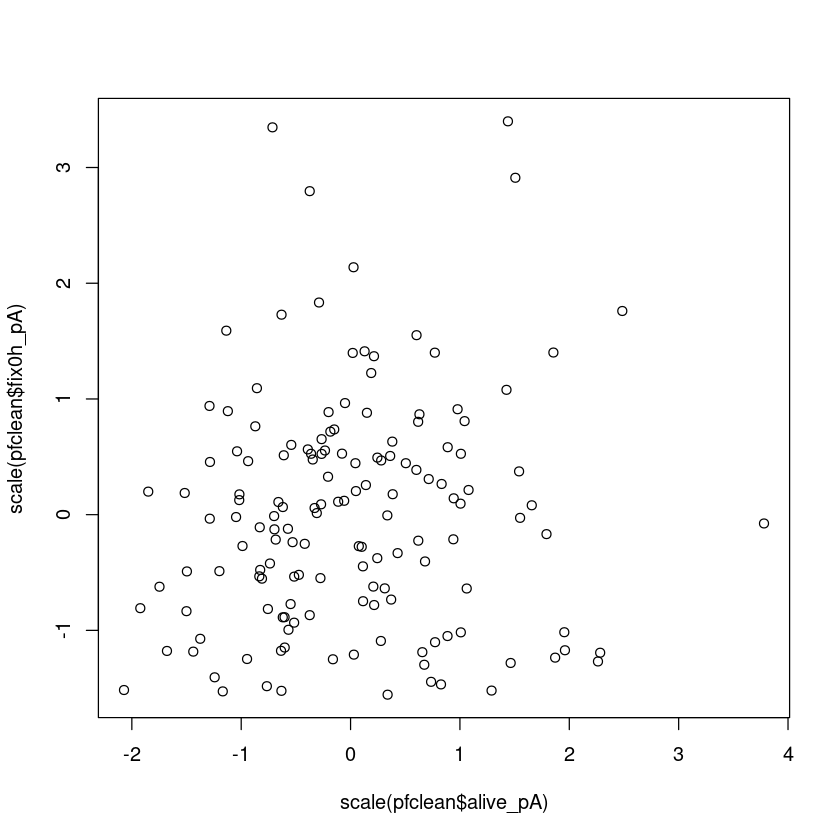

In [13]:
plot(scale(pfclean$alive_pA),scale(pfclean$fix0h_pA))

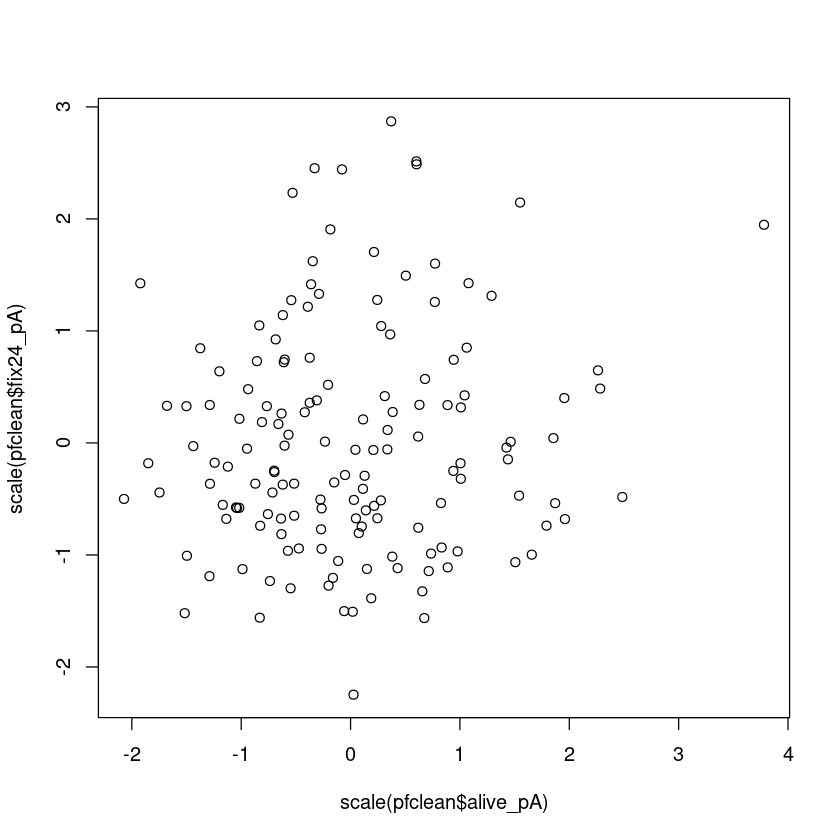

In [14]:
plot(scale(pfclean$alive_pA),scale(pfclean$fix24_pA))

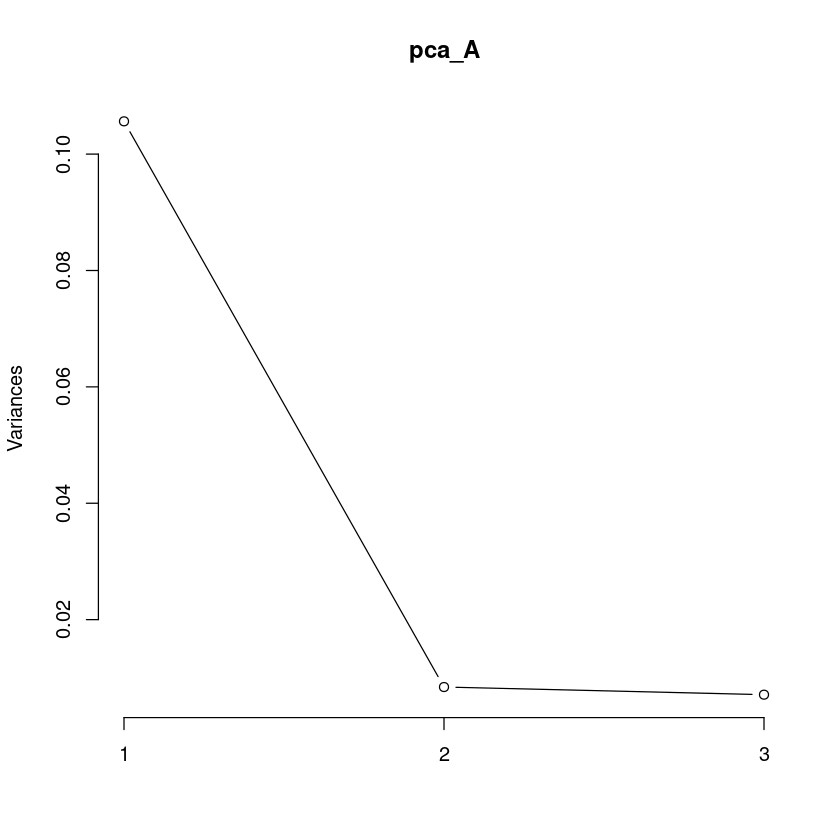

In [15]:
plot(pca_A,type="l")

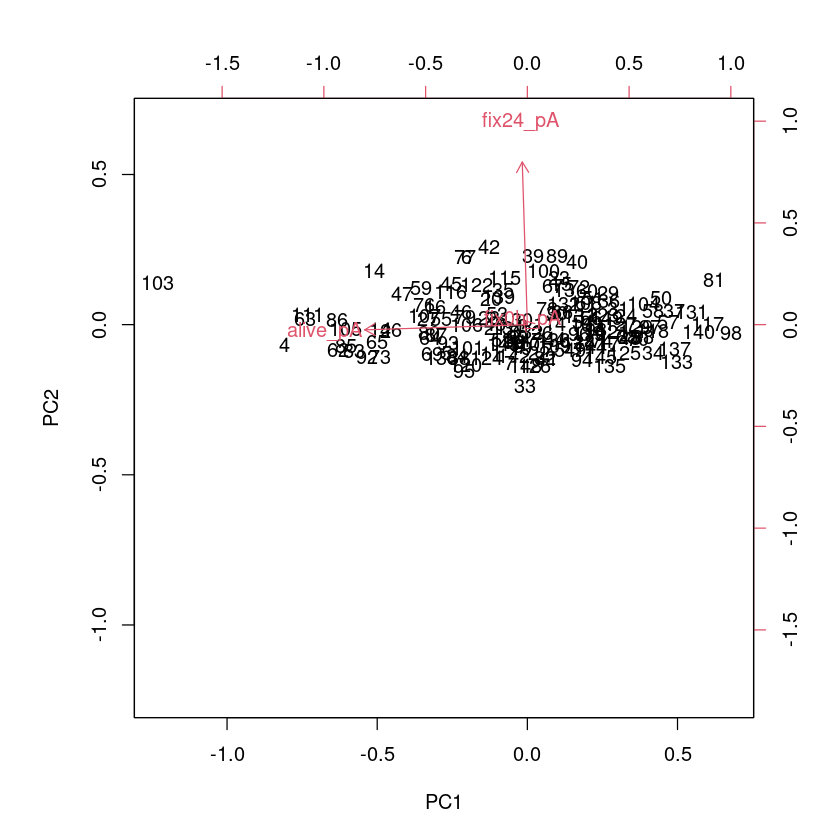

In [16]:
biplot(pca_A, scale=0)

In [17]:
str(pca_A)

List of 5
 $ sdev    : num [1:3] 0.325 0.0917 0.0843
 $ rotation: num [1:3, 1:3] -0.9992 -0.026 -0.0313 -0.032 0.0264 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "alive_pA" "fix0h_pA" "fix24_pA"
  .. ..$ : chr [1:3] "PC1" "PC2" "PC3"
 $ center  : Named num [1:3] 1.366 0.136 0.152
  ..- attr(*, "names")= chr [1:3] "alive_pA" "fix0h_pA" "fix24_pA"
 $ scale   : logi FALSE
 $ x       : num [1:149, 1:3] -0.4649 -0.474 -0.0152 -0.8087 -0.2681 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "PC1" "PC2" "PC3"
 - attr(*, "class")= chr "prcomp"


In [18]:
head(pca_A)

$sdev
[1] 0.32500655 0.09173988 0.08428990

$rotation
                 PC1         PC2         PC3
alive_pA -0.99917331 -0.03197688  0.02510346
fix0h_pA -0.02595234  0.02641425 -0.99931415
fix24_pA -0.03129186  0.99913951  0.02722228

$center
 alive_pA  fix0h_pA  fix24_pA 
1.3658466 0.1364419 0.1517455 

$scale
[1] FALSE

$x
                PC1          PC2           PC3
  [1,] -0.464876059 -0.016212433 -0.0797814235
  [2,] -0.473968608 -0.020851188 -0.2763027646
  [3,] -0.015196948 -0.005084499 -0.0374286647
  [4,] -0.808715630 -0.066350160 -0.1299167180
  [5,] -0.268071844 -0.094102808 -0.0180039986
  [6,] -0.203351968  0.226293890 -0.0215230071
  [7,] -0.059944036 -0.127035637 -0.1055353316
  [8,] -0.043930230 -0.025175727 -0.1191697258
  [9,] -0.030315560 -0.070444636  0.0224783474
 [10,]  0.225621826 -0.025885681 -0.2902012877
 [11,] -0.122262788 -0.096092900 -0.0528645607
 [12,]  0.200268158  0.034576816 -0.1507505868
 [13,]  0.122037940  0.117399254 -0.0478620709
 [14,] -0.509125625  0.181647040  0.0203619487
 [15,]  0.111950024  0.135491831 -0.0439196602
 [16,] -0.308507388  0.058938840 -0.0024014208
 [17,]  0.271355011 -0.060650522  0.0318143976
 [18,]  0.227546063 -0.015572710 -0.0052834049
 [19,] -0.021566670 -0.075551781  0.0216158002
 [20,] -0.121421908  0.086673736 -0.0375482359
 [21,] -0.108936586 -0.008825190  0.0031331101
 [22,]  0.039558916 -0.095713343 -0.0130268640
 [23,]  0.106468612  0.154204657 -0.0390798001
 [24,]  0.328812026  0.030807351 -0.0225982747
 [25,]  0.337288693 -0.041573517 -0.0562532324
 [26,]  0.047851781 -0.029297574 -0.0644230110
 [27,] -0.329409185  0.019952568 -0.0355114719
 [28,] -0.126189492  0.021849296 -0.0111186678
 [29,]  0.268911680  0.104166491  0.0409375820
 [30,]  0.099081911  0.038284108 -0.0027251178
 [31,]  0.301539275  0.055000020 -0.0455672052
 [32,]  0.015186475 -0.023716288 -0.0827404074
 [33,] -0.007011512 -0.202646063 -0.1863616818
 [34,]  0.419914925 -0.094132581 -0.0930110950
 [35,] -0.082101024  0.114298227  0.0370121128
 [36,]  0.273352154  0.078656066 -0.0976465457
 [37,]  0.487775560  0.043966750  0.0591799332
 [38,] -0.229289873 -0.112166309 -0.0230911042
 [39,]  0.017163192  0.227074395 -0.0391373558
 [40,]  0.166127477  0.210773565  0.0214076233
 [41,]  0.066968106 -0.113351760 -0.0798499329
 [42,] -0.127083642  0.259153850  0.0723299918
 [43,] -0.106831647  0.003669912  0.1346987655
 [44,]  0.092082716 -0.044948259  0.0428892923
 [45,] -0.252898721  0.137060789  0.1035916323
 [46,] -0.221684413  0.044656529  0.0411979662
 [47,] -0.418812055  0.104282807  0.1424583226
 [48,]  0.341418957 -0.042251739 -0.0082454109
 [49,]  0.157228585 -0.083103666  0.0377872590
 [50,]  0.445940987  0.089784282  0.0816913133
 [51,]  0.219913679  0.091829655  0.0149655136
 [52,] -0.086053180 -0.052602562  0.0933447579
 [53,] -0.101230809  0.033872736  0.0574982472
 [54,]  0.186214276  0.010441939  0.0797347189
 [55,] -0.286339417  0.019596755  0.0968521504
 [56,]  0.213387646  0.022660208 -0.0142121910
 [57,]  0.469389951  0.009667265  0.0883711086
 [58,]  0.416844502  0.044541333 -0.0067092531
 [59,] -0.354703757  0.120735490 -0.0056724485
 [60,]  0.197487702  0.111763195 -0.0077415242
 [61,]  0.195805431  0.072303431  0.0941297035
 [62,] -0.631542938 -0.085647493  0.1134424204
 [63,] -0.739373627  0.018367677  0.1207934030
 [64,] -0.323977418 -0.042242782  0.0934931961
 [65,] -0.499456628 -0.058551224 -0.0202615021
 [66,]  0.114012763  0.043180540 -0.2387451479
 [67,]  0.085743816  0.129768031 -0.1541663507
 [68,]  0.331714307 -0.042524527 -0.0204091005
 [69,] -0.316752118 -0.097370900 -0.0715636899
 [70,]  0.367149227 -0.047113418 -0.1455357502
 [71,]  0.188886578 -0.083072622  0.0032427876
 [72,]  0.170942648  0.124455037 -0.0522478973
 [73,] -0.492228168 -0.107272704 -0.2367845418
 [74,]  0.248915777 -0.052546501  0.0612309853
 [75,]  0.087496992 -0.083224187 -0.0489657263
 [76,] -0.345675542  0.065952588  0.0647945292
 [77,] -0.206335355  0.226484411 -0.1201081638
 [78,] 

In [19]:
pca_A$x

PC1,PC2,PC3
-0.46487606,-0.016212433,-0.079781424
-0.47396861,-0.020851188,-0.276302765
-0.01519695,-0.005084499,-0.037428665
-0.80871563,-0.066350160,-0.129916718
-0.26807184,-0.094102808,-0.018003999
-0.20335197,0.226293890,-0.021523007
-0.05994404,-0.127035637,-0.105535332
-0.04393023,-0.025175727,-0.119169726
-0.03031556,-0.070444636,0.022478347
0.22562183,-0.025885681,-0.290201288


In [20]:
pf_A <- cbind(pfclean[,1:3],pca_A$x[,1:2]) 

In [21]:
head(pf_A)

,alive_pA,fix0h_pA,fix24_pA,PC1,PC2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.828854,0.227805,0.147922,-0.46487606,-0.016212433
2,1.833154,0.424305,0.138222,-0.47396861,-0.020851188
3,1.380254,0.174105,0.146122,-0.01519695,-0.005084499
4,2.172754,0.285505,0.107222,-0.80871563,-0.066350160
5,1.636254,0.158905,0.065622,-0.26807184,-0.094102808
6,1.561254,0.169205,0.383622,-0.20335197,0.226293890


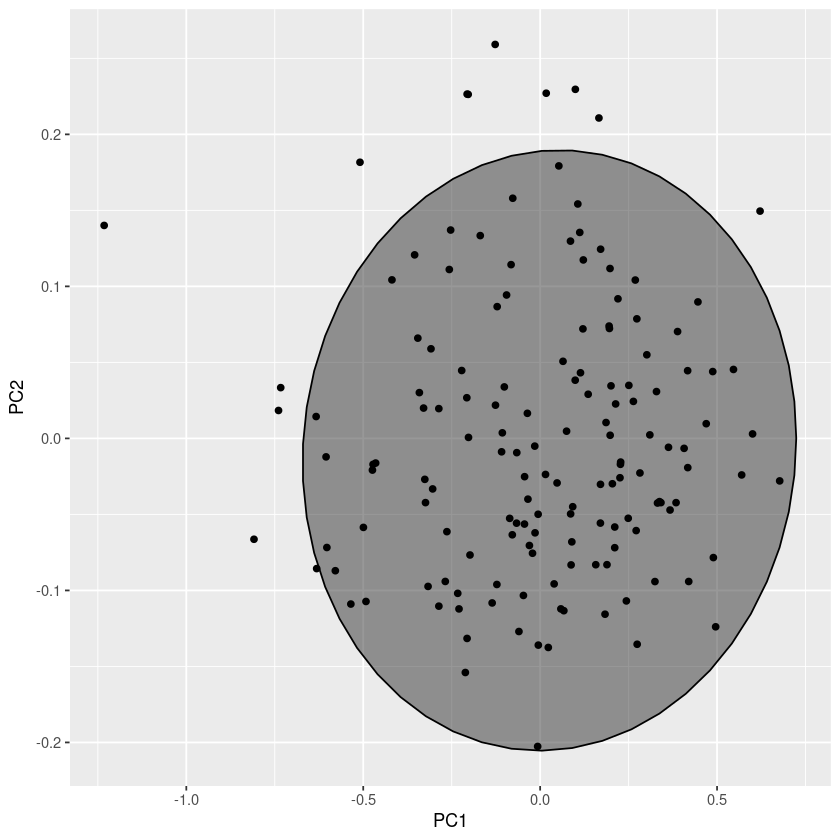

In [22]:
ggplot(pf_A, aes(x=PC1, y=PC2)) +
stat_ellipse(geom="polygon",alpha=0.5,col="black") +
geom_point()

In [23]:
pca_B <- prcomp(pfclean[4:6])

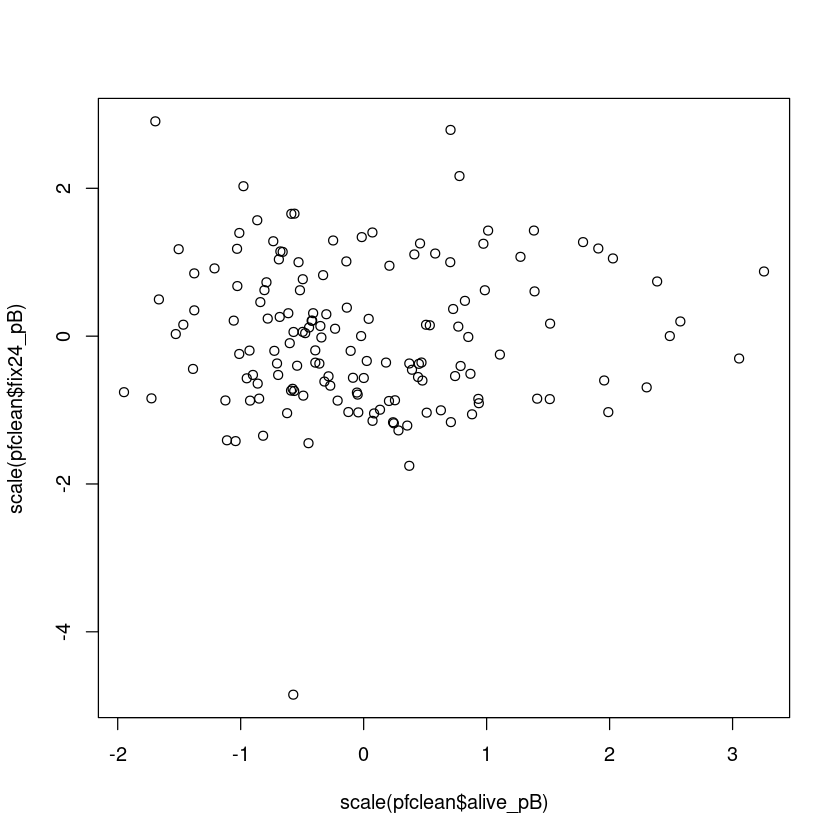

In [24]:
plot(scale(pfclean$alive_pB),scale(pfclean$fix24_pB))

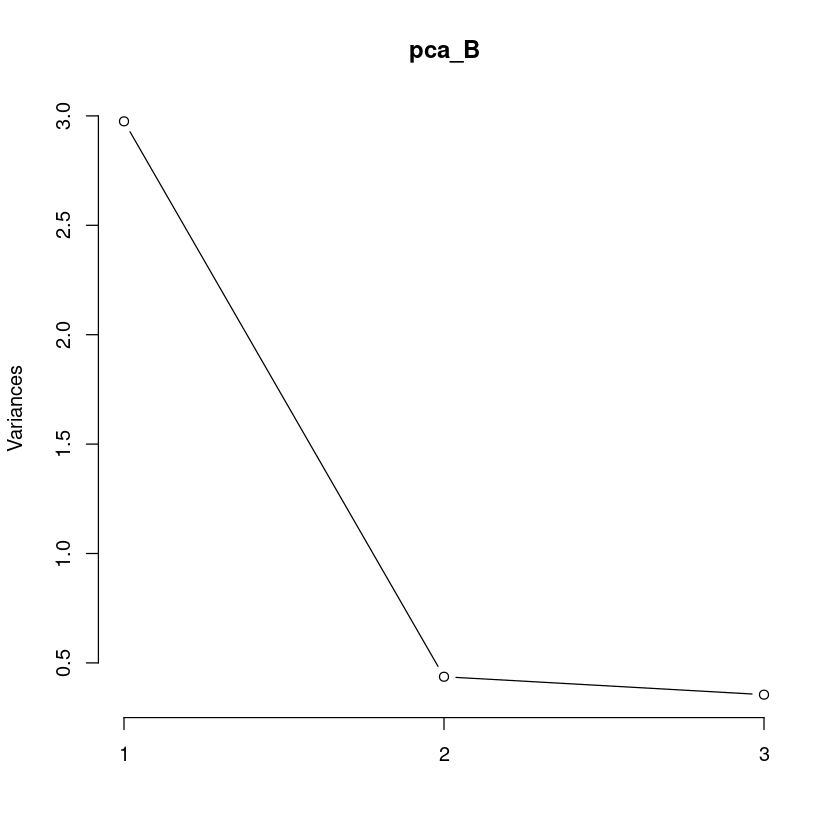

In [25]:
plot(pca_B,type="l")

In [26]:
summary(pca_B)

Importance of components:
                          PC1    PC2     PC3
Standard deviation     1.7249 0.6609 0.59571
Proportion of Variance 0.7898 0.1160 0.09421
Cumulative Proportion  0.7898 0.9058 1.00000

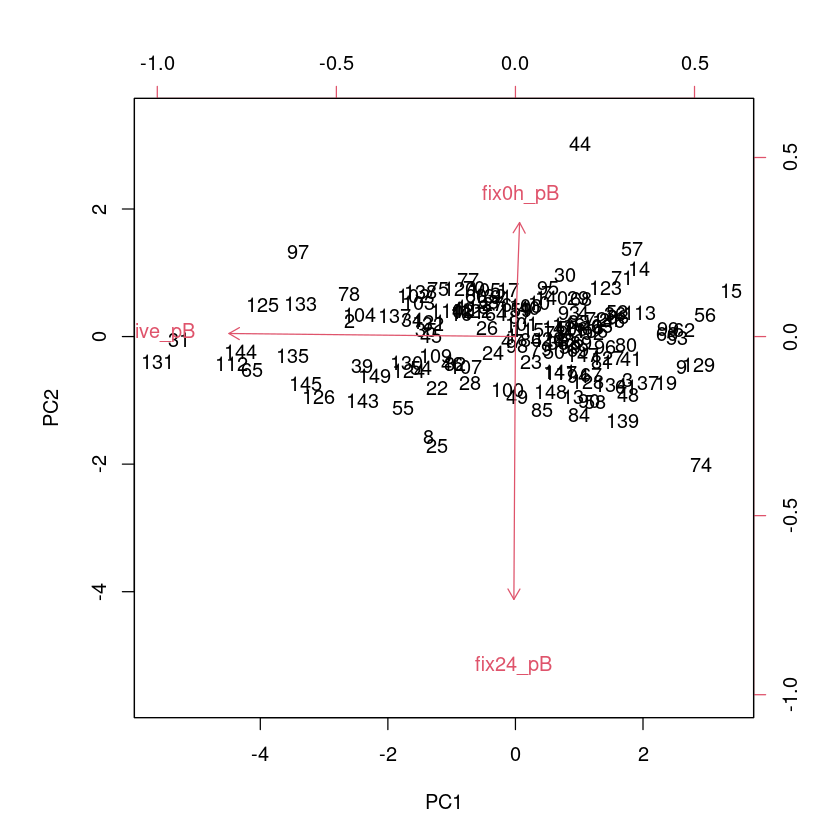

In [27]:
biplot(pca_B,scale=0)

In [28]:
pf_B <- cbind(pfclean[4:6],pca_B$x[,1:2])
head(pf_B)

,alive_pB,fix0h_pB,fix24_pB,PC1,PC2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.366554,3.112105,2.911222,-0.06543265,0.02275978
2,8.910854,3.508205,2.869222,-2.60346698,0.24619184
3,4.524554,2.046505,3.200122,1.75935770,-0.68605525
4,5.222654,2.116405,2.080422,1.06840648,0.37640213
5,5.566754,3.367805,2.894522,0.73806415,0.13125674
6,6.442254,2.390605,2.078322,-0.14706664,0.50051978


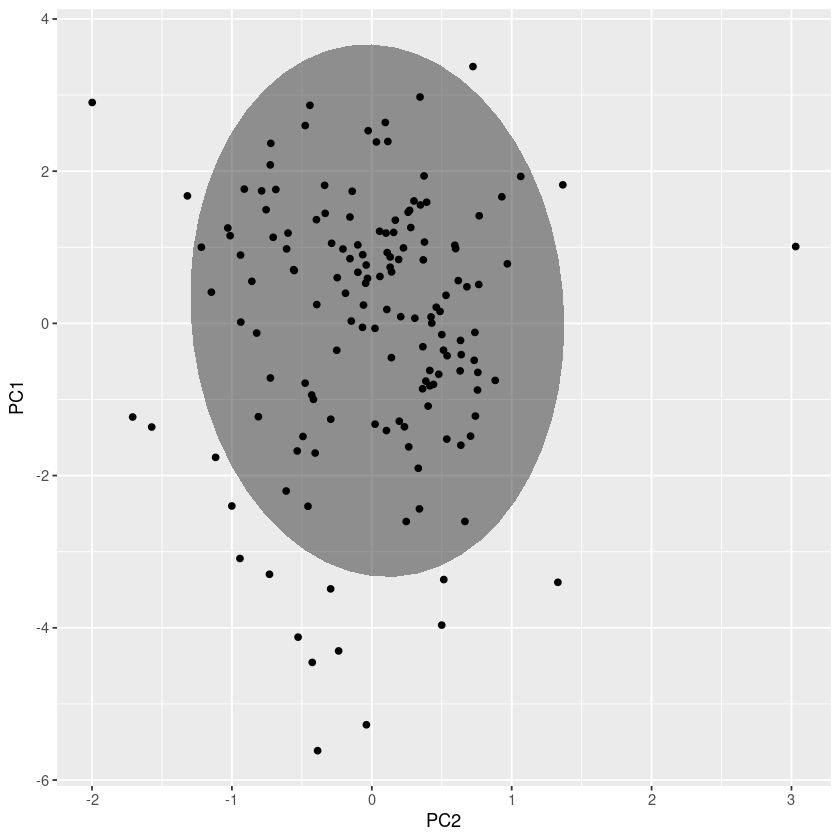

In [29]:
ggplot(pf_B, aes(PC2, PC1)) +
stat_ellipse(geom="polygon",alpha=0.5) +
geom_point()